In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from biopsykit.utils.dataframe_handling import multi_xs
import optuna

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from fau_colors import register_cmaps
register_cmaps()

sns.set_theme(context="paper", style="white", palette="faculties", font_scale=1.2)

%matplotlib widget

In [4]:
def conf_matrix(confusion_matrix):
    x = confusion_matrix.sum(axis=1)[:, np.newaxis]
    confusion_matrix /=x
    confusion_matrix *= 100
    confusion_matrix = round(confusion_matrix,2)

    #confusion_matrix = confusion_matrix.applymap(lambda x: '{:.2f}'.format(x))
    #confusion_matrix = confusion_matrix.applymap(
    #    lambda x: float(x) if x != '0.00' else 0.0
    #)
    
    #display(confusion_matrix)
    return confusion_matrix

In [5]:
##### Fill in Algorithm here!! ####
algorithm = "LSTM"
##### Fill in Algorithm here!! ####

In [6]:
path = Path.cwd().parents[2].joinpath("exports/results_per_algorithm/")
path = path.joinpath(algorithm)
# path where database files are stored
db_path = path.joinpath("db")

# 5 Stage
# Acc only

In [7]:
stage = "5stage"
mod = "acc"

In [8]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [9]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [10]:
results.groupby("metric").agg([np.median, lambda x: np.percentile(x, 75) - np.percentile(x, 25)])

data            
                             median  <lambda_0>
metric                                         
accuracy                   0.560641    0.130713
bed_interval_end        1051.500000  181.250000
bed_interval_start        52.500000  121.000000
f1                         0.464750    0.132176
getup_latency              0.000000    4.000000
kappa                      0.300200    0.181270
mcc                        0.366766    0.180670
net_sleep_duration       772.000000  239.250000
precision                  0.454739    0.148889
recall                     0.560641    0.130713
sleep_efficiency          80.572475   18.118732
sleep_onset              129.000000  133.250000
sleep_onset_latency       47.500000  106.250000
specifity                  0.867766    0.083789
total_sleep_duration     986.500000  196.750000
wake_after_sleep_onset    91.000000  138.750000
wake_onset              1029.500000  184.250000

In [11]:
confusion_matrix_acc = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc

,wake,n1,n2,n3,rem
wake,54788.0,0.0,26071.0,0.0,0.0
n1,5435.0,0.0,17667.0,0.0,0.0
n2,10299.0,0.0,82784.0,0.0,0.0
n3,860.0,0.0,16224.0,0.0,0.0
rem,1751.0,0.0,30069.0,0.0,0.0


# 5 Stage
# Acc + HRV

In [12]:
stage = "5stage"
mod = "acc_hrv"

In [13]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [14]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [15]:
results.groupby("metric").agg([np.median, lambda x: np.percentile(x, 75) - np.percentile(x, 25)])

data            
                             median  <lambda_0>
metric                                         
accuracy                   0.648635    0.149262
bed_interval_end        1051.500000  181.250000
bed_interval_start        52.500000  121.000000
f1                         0.596343    0.154900
getup_latency              2.000000    9.000000
kappa                      0.460052    0.201197
mcc                        0.503365    0.172288
net_sleep_duration       793.500000  205.250000
precision                  0.657689    0.137593
recall                     0.648635    0.149262
sleep_efficiency          82.075936   15.664927
sleep_onset              120.000000  133.250000
sleep_onset_latency       22.500000   80.250000
specifity                  0.884085    0.064560
total_sleep_duration     986.500000  196.750000
wake_after_sleep_onset    99.000000  119.000000
wake_onset              1048.500000  175.500000

In [16]:
confusion_matrix_acc_hrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv

,wake,n1,n2,n3,rem
wake,55853.0,286.0,19649.0,79.0,4992.0
n1,4170.0,266.0,16338.0,14.0,2314.0
n2,5136.0,161.0,81859.0,1501.0,4426.0
n3,355.0,0.0,14752.0,1670.0,307.0
rem,1475.0,112.0,12105.0,3.0,18125.0


# 5 Stage
# ACC + HRV + RRV

In [17]:
stage = "5stage"
mod = "acc_hrv_RRV"

In [18]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [19]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [20]:
results.groupby("metric").agg([np.median, lambda x: np.percentile(x, 75) - np.percentile(x, 25)])

data            
                             median  <lambda_0>
metric                                         
accuracy                   0.657431    0.118764
bed_interval_end        1051.500000  181.250000
bed_interval_start        52.500000  121.000000
f1                         0.600825    0.123728
getup_latency              1.000000    3.250000
kappa                      0.472891    0.172742
mcc                        0.513862    0.156241
net_sleep_duration       759.500000  210.000000
precision                  0.645528    0.134704
recall                     0.657431    0.118764
sleep_efficiency          78.677060   15.796027
sleep_onset              124.000000  141.500000
sleep_onset_latency       35.500000   81.250000
specificity                0.902364    0.063433
total_sleep_duration     986.500000  196.750000
wake_after_sleep_onset   124.000000  127.250000
wake_onset              1045.000000  170.750000

In [21]:
confusion_matrix_acc_hrv_rrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_rrv

,wake,n1,n2,n3,rem
wake,60158.0,419.0,17272.0,3.0,3007.0
n1,4824.0,329.0,16492.0,0.0,1457.0
n2,5736.0,206.0,84054.0,266.0,2821.0
n3,374.0,3.0,16040.0,409.0,258.0
rem,2016.0,162.0,13660.0,0.0,15982.0


# 5 Stage
# ACC + HRV + EDR

In [22]:
stage = "5stage"
mod = "acc_hrv_EDR"

In [23]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [24]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [25]:
results.groupby("metric").agg([np.median, lambda x: np.percentile(x, 75) - np.percentile(x, 25)])

data            
                             median  <lambda_0>
metric                                         
accuracy                   0.636781    0.130655
bed_interval_end        1051.500000  181.250000
bed_interval_start        52.500000  121.000000
f1                         0.572351    0.147957
getup_latency              2.000000    6.250000
kappa                      0.451791    0.186391
mcc                        0.485605    0.164035
net_sleep_duration       792.000000  177.250000
precision                  0.609113    0.139403
recall                     0.636781    0.130655
sleep_efficiency          81.759684   15.028112
sleep_onset              121.000000  134.250000
sleep_onset_latency       31.000000   86.250000
specifity                  0.889002    0.063030
total_sleep_duration     986.500000  196.750000
wake_after_sleep_onset   100.000000  112.500000
wake_onset              1047.000000  169.250000

In [26]:
confusion_matrix_acc_hrv_edr = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_edr

,wake,n1,n2,n3,rem
wake,55576.0,62.0,20821.0,32.0,4368.0
n1,4041.0,53.0,17148.0,3.0,1857.0
n2,5305.0,30.0,83158.0,538.0,4052.0
n3,397.0,0.0,15842.0,549.0,296.0
rem,1840.0,55.0,13294.0,0.0,16631.0


/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93107/153225357.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93107/153225357.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93107/153225357.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93

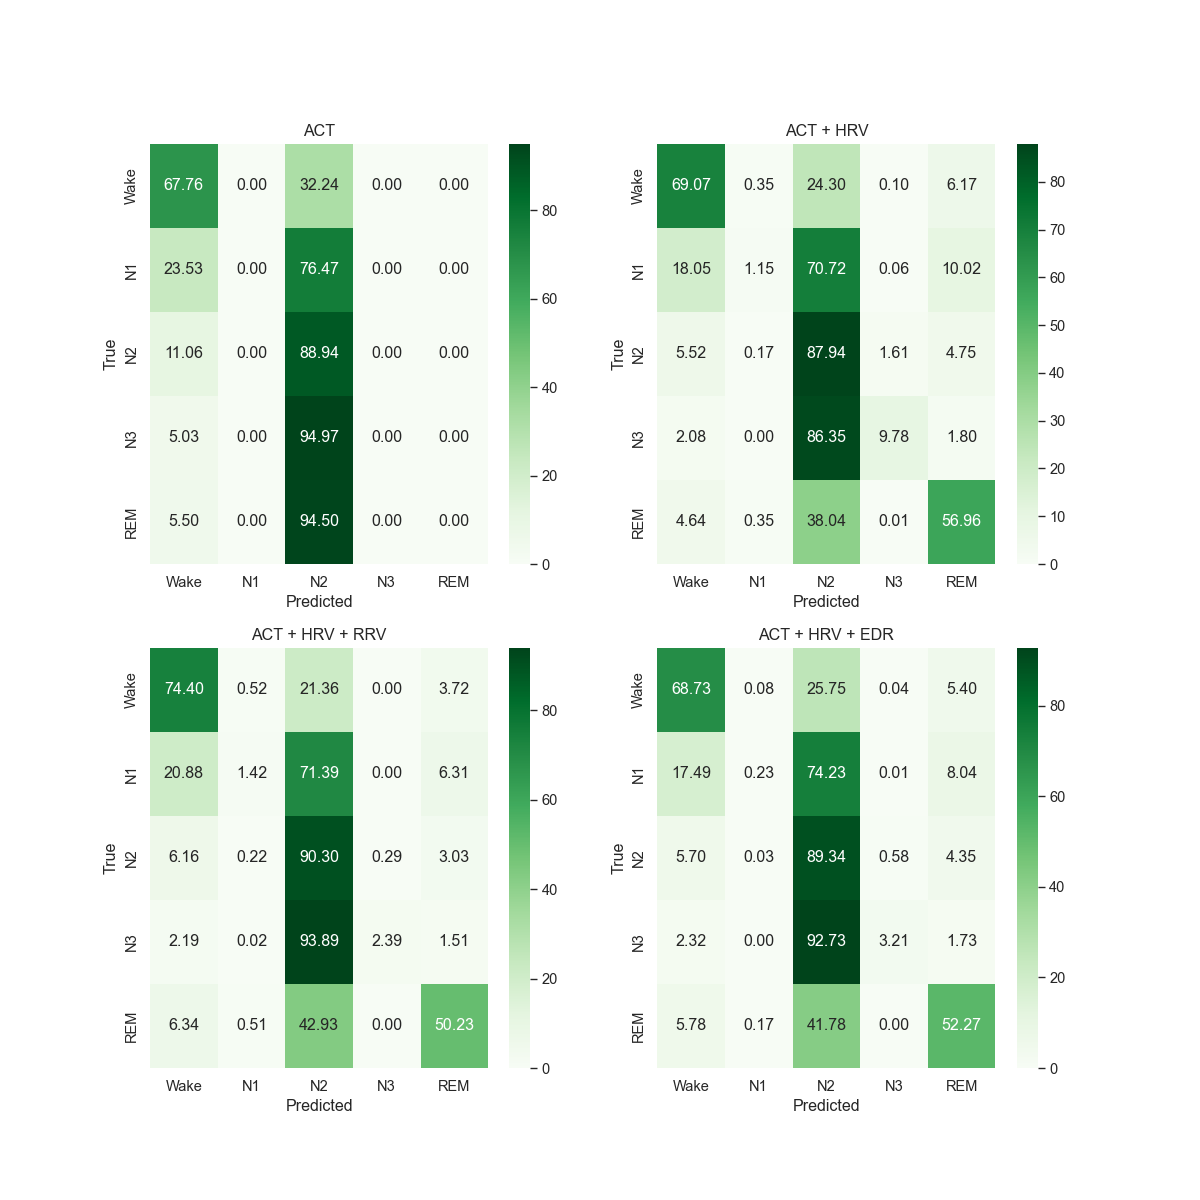

In [27]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize = (12,12))
sns.heatmap(conf_matrix(confusion_matrix_acc.rename(columns={"wake":"Wake", "n1":"N1", "n2":"N2", "n3":"N3", "rem": "REM"}, index = {"wake":"Wake", "n1":"N1", "n2":"N2", "n3":"N3", "rem": "REM"} )
), fmt=',.2f',annot=True, ax=axs[0,0], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv.rename(columns={"wake":"Wake", "n1":"N1", "n2":"N2", "n3":"N3", "rem": "REM"}, index = {"wake":"Wake", "n1":"N1", "n2":"N2", "n3":"N3", "rem": "REM"} )
), fmt=',.2f',annot=True, ax=axs[0,1], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_rrv.rename(columns={"wake":"Wake", "n1":"N1", "n2":"N2", "n3":"N3", "rem": "REM"}, index = {"wake":"Wake", "n1":"N1", "n2":"N2", "n3":"N3", "rem": "REM"} )
), fmt=',.2f',annot=True, ax=axs[1,0], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_edr.rename(columns={"wake":"Wake", "n1":"N1", "n2":"N2", "n3":"N3", "rem": "REM"}, index = {"wake":"Wake", "n1":"N1", "n2":"N2", "n3":"N3", "rem": "REM"} )
), fmt=',.2f',annot=True, ax=axs[1,1], cmap="Greens")
axs[0,0].set_title("ACT")
axs[0,0].set_ylabel("True")
axs[0,0].set_xlabel("Predicted")

axs[0,1].set_title("ACT + HRV")
axs[0,1].set_ylabel("True")
axs[0,1].set_xlabel("Predicted")

axs[1,0].set_title("ACT + HRV + RRV")
axs[1,0].set_ylabel("True")
axs[1,0].set_xlabel("Predicted")

axs[1,1].set_title("ACT + HRV + EDR")
axs[1,1].set_ylabel("True")
axs[1,1].set_xlabel("Predicted")
plt.savefig("confusionmatrix_" + algorithm + "_" + stage + ".pdf",     
    format="pdf",
    bbox_inches="tight")

### Params

In [28]:
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_RRV_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_EDR_" + stage + ".db")[0].best_trial.params)

{'batch_size': 512,
 'hidden_size': 388,
 'learning_rate': 0.0025448906102420754,
 'num_layers': 1,
 'seq_len': 51}

{'batch_size': 512,
 'hidden_size': 504,
 'learning_rate': 0.0002241570791681932,
 'num_layers': 2,
 'seq_len': 51}

{'batch_size': 512,
 'hidden_size': 288,
 'learning_rate': 0.0003583148932841744,
 'num_layers': 3,
 'seq_len': 101}

{'batch_size': 512,
 'hidden_size': 352,
 'learning_rate': 0.0004668422817464261,
 'num_layers': 2,
 'seq_len': 21}

# 3 Stage
# Acc

In [29]:
stage = "3stage"
mod = "acc"

In [30]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [31]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [32]:
results.groupby("metric").agg([np.median, lambda x: np.percentile(x, 75) - np.percentile(x, 25)])

data            
                             median  <lambda_0>
metric                                         
accuracy                   0.714572    0.113936
bed_interval_end        1051.500000  181.250000
bed_interval_start        52.500000  121.000000
f1                         0.652845    0.117278
getup_latency              0.000000    3.000000
kappa                      0.414315    0.244436
mcc                        0.473652    0.213122
net_sleep_duration       818.000000  219.250000
precision                  0.647165    0.110547
recall                     0.714572    0.113936
sleep_efficiency          84.758697   16.865673
sleep_onset              122.000000  129.500000
sleep_onset_latency       38.000000   85.750000
specifity                  0.848759    0.124763
total_sleep_duration     986.500000  196.750000
wake_after_sleep_onset    59.500000  102.000000
wake_onset              1033.000000  179.500000

In [33]:
confusion_matrix_acc = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc

,wake,nrem,rem
wake,49829.0,31030.0,0.0
nrem,10934.0,122335.0,0.0
rem,1080.0,30740.0,0.0


# 3 Stage
# Acc + HRV

In [34]:
stage = "3stage"
mod = "acc_hrv"

In [35]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [36]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [37]:
results.groupby("metric").agg([np.median, lambda x: np.percentile(x, 75) - np.percentile(x, 25)])

data            
                             median  <lambda_0>
metric                                         
accuracy                   0.776754    0.107070
bed_interval_end        1051.500000  181.250000
bed_interval_start        52.500000  121.000000
f1                         0.755368    0.122135
getup_latency              0.000000    0.000000
kappa                      0.569565    0.212568
mcc                        0.604352    0.194161
net_sleep_duration       834.500000  208.750000
precision                  0.803632    0.091612
recall                     0.776754    0.107070
sleep_efficiency          87.278630   13.212349
sleep_onset              117.500000  125.500000
sleep_onset_latency       21.000000   66.000000
specifity                  0.873801    0.081664
total_sleep_duration     986.500000  196.750000
wake_after_sleep_onset    65.500000   96.000000
wake_onset              1047.500000  166.250000

In [38]:
confusion_matrix_acc_hrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv

,wake,nrem,rem
wake,49551.0,27969.0,3339.0
nrem,5018.0,124292.0,3959.0
rem,1271.0,16411.0,14138.0


# 3 Stage
# Acc + HRV + RRV

In [39]:
stage = "3stage"
mod = "acc_hrv_RRV"

In [40]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [41]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [42]:
results.groupby("metric").agg([np.median, lambda x: np.percentile(x, 75) - np.percentile(x, 25)])

data            
                             median  <lambda_0>
metric                                         
accuracy                   0.790034    0.097553
bed_interval_end        1051.500000  181.250000
bed_interval_start        52.500000  121.000000
f1                         0.777244    0.112715
getup_latency              2.000000    9.000000
kappa                      0.604851    0.218247
mcc                        0.621507    0.197454
net_sleep_duration       791.000000  194.500000
precision                  0.802055    0.098428
recall                     0.790034    0.097553
sleep_efficiency          82.746615   15.685969
sleep_onset              121.000000  135.750000
sleep_onset_latency       35.500000   86.250000
specificity                0.868521    0.099230
total_sleep_duration     986.500000  196.750000
wake_after_sleep_onset    97.500000  125.000000
wake_onset              1047.000000  170.750000

In [43]:
confusion_matrix_acc_hrv_rrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_rrv

,wake,nrem,rem
wake,55371.0,21553.0,3935.0
nrem,9017.0,119206.0,5046.0
rem,1605.0,13963.0,16252.0


# 3 Stage
# Acc + HRV + EDR

In [44]:
stage = "3stage"
mod = "acc_hrv_EDR"

In [45]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [46]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [47]:
results.groupby("metric").agg([np.median, lambda x: np.percentile(x, 75) - np.percentile(x, 25)])

data            
                             median  <lambda_0>
metric                                         
accuracy                   0.774985    0.115345
bed_interval_end        1051.500000  181.250000
bed_interval_start        52.500000  121.000000
f1                         0.756442    0.131019
getup_latency              1.000000    4.000000
kappa                      0.562387    0.224286
mcc                        0.592670    0.203795
net_sleep_duration       827.500000  192.250000
precision                  0.797527    0.095236
recall                     0.774985    0.115345
sleep_efficiency          84.921626   12.194235
sleep_onset              115.000000  128.500000
sleep_onset_latency       21.500000   70.250000
specificity                0.872687    0.090564
total_sleep_duration     986.500000  196.750000
wake_after_sleep_onset    79.000000  107.000000
wake_onset              1045.000000  165.750000

In [48]:
confusion_matrix_acc_hrv_edr = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_edr

,wake,nrem,rem
wake,51093.0,26785.0,2981.0
nrem,6696.0,123182.0,3391.0
rem,1395.0,17465.0,12960.0


In [49]:
sns.set_theme(context="talk", style="white", palette="faculties", font_scale=1.2)


In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize = (18,18))
sns.heatmap(conf_matrix(confusion_matrix_acc.rename(columns={"wake":"Wake", "nrem":"NREM", "rem": "REM"}, index = {"wake":"Wake", "nrem":"NREM", "rem": "REM"})), fmt=',.2f',annot=True, ax=axs[0,0], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv.rename(columns={"wake":"Wake", "nrem":"NREM", "rem": "REM"}, index = {"wake":"Wake", "nrem":"NREM", "rem": "REM"})), fmt=',.2f',annot=True, ax=axs[0,1], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_rrv.rename(columns={"wake":"Wake", "nrem":"NREM", "rem": "REM"}, index = {"wake":"Wake", "nrem":"NREM", "rem": "REM"})), fmt=',.2f',annot=True, ax=axs[1,0], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_edr.rename(columns={"wake":"Wake", "nrem":"NREM", "rem": "REM"}, index = {"wake":"Wake", "nrem":"NREM", "rem": "REM"})), fmt=',.2f',annot=True, ax=axs[1,1], cmap="Greens")
axs[0,0].set_title("ACT")
axs[0,0].set_ylabel("True")
axs[0,0].set_xlabel("Predicted")

axs[0,1].set_title("ACT + HRV")
axs[0,1].set_ylabel("True")
axs[0,1].set_xlabel("Predicted")

axs[1,0].set_title("ACT + HRV + RRV")
axs[1,0].set_ylabel("True")
axs[1,0].set_xlabel("Predicted")

axs[1,1].set_title("ACT + HRV + EDR")
axs[1,1].set_ylabel("True")
axs[1,1].set_xlabel("Predicted")

plt.savefig("confusionmatrix_" + algorithm + "_" + stage + ".pdf",     
    format="pdf",
    bbox_inches="tight")

### Params

In [ ]:
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_RRV_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_EDR_" + stage + ".db")[0].best_trial.params)

### n_trials

In [ ]:
[optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_" + stage + ".db")[0].n_trials,
optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_" + stage + ".db")[0].n_trials,
optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_RRV_" + stage + ".db")[0].n_trials,
optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_EDR_" + stage + ".db")[0].n_trials]

# Binary
# Acc only

In [ ]:
stage = "binary"
mod = "acc"

In [ ]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [ ]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [ ]:
results.groupby("metric").agg([np.median, lambda x: np.percentile(x, 75) - np.percentile(x, 25)])

In [ ]:
confusion_matrix_acc = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc

# Binary
# Acc + HRV

In [ ]:
stage = "binary"
mod = "acc_hrv"

In [ ]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [ ]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [ ]:
results.groupby("metric").agg([np.median, lambda x: np.percentile(x, 75) - np.percentile(x, 25)])

In [ ]:
confusion_matrix_acc_hrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv

# Binary
# Acc + HRV + RRV

In [ ]:
stage = "binary"
mod = "acc_hrv_RRV"

In [ ]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [ ]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [ ]:
results.groupby("metric").agg([np.median, lambda x: np.percentile(x, 75) - np.percentile(x, 25)])

In [ ]:
confusion_matrix_acc_hrv_rrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_rrv

# Binary
# Acc + HRV + EDR

In [ ]:
stage = "binary"
mod = "acc_hrv_EDR"

In [ ]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [ ]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [ ]:
results.groupby("metric").agg([np.median, lambda x: np.percentile(x, 75) - np.percentile(x, 25)])

In [ ]:
confusion_matrix_acc_hrv_edr = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_edr

In [ ]:
sns.set_theme(context="poster", style="white", palette="faculties", font_scale=1.2)

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize = (20,20))

sns.heatmap(conf_matrix(confusion_matrix_acc.rename(columns={"wake":"Wake", "sleep":"Sleep"}, index = {"wake":"Wake", "sleep":"Sleep"})), fmt=',.2f',annot=True, ax=axs[0,0], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv.rename(columns={"wake":"Wake", "sleep":"Sleep"}, index = {"wake":"Wake", "sleep":"Sleep"})), fmt=',.2f',annot=True, ax=axs[0,1], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_rrv.rename(columns={"wake":"Wake", "sleep":"Sleep"}, index = {"wake":"Wake", "sleep":"Sleep"})), fmt=',.2f',annot=True, ax=axs[1,0], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_edr.rename(columns={"wake":"Wake", "sleep":"Sleep"}, index = {"wake":"Wake", "sleep":"Sleep"})), fmt=',.2f',annot=True, ax=axs[1,1], cmap="Greens")
axs[0,0].set_title("ACT")
axs[0,0].set_ylabel("True")
axs[0,0].set_xlabel("Predicted")

axs[0,1].set_title("ACT + HRV")
axs[0,1].set_ylabel("True")
axs[0,1].set_xlabel("Predicted")

axs[1,0].set_title("ACT + HRV + RRV")
axs[1,0].set_ylabel("True")
axs[1,0].set_xlabel("Predicted")

axs[1,1].set_title("ACT + HRV + EDR")
axs[1,1].set_ylabel("True")
axs[1,1].set_xlabel("Predicted")

plt.savefig("confusionmatrix_" + algorithm + "_" + stage + ".pdf",     
    format="pdf",
    bbox_inches="tight")

### Params

In [ ]:
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_RRV_" + stage + ".db")[0].best_trial.params)
display(optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_EDR_" + stage + ".db")[0].best_trial.params)

### n_trials

In [ ]:
[optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_" + stage + ".db")[0].n_trials,
optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_" + stage + ".db")[0].n_trials,
optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_RRV_" + stage + ".db")[0].n_trials,
optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_EDR_" + stage + ".db")[0].n_trials]

# Number of stages

In [ ]:
confusion_matrix = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + "5stage" + ".csv"), index_col = "Unnamed: 0")
five_count = confusion_matrix["wake"]+ confusion_matrix["n1"]+ confusion_matrix["n2"]+ confusion_matrix["n3"]+ confusion_matrix["rem"]

In [ ]:
confusion_matrix = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + "3stage" + ".csv"), index_col = "Unnamed: 0")
three_count = confusion_matrix["wake"]+ confusion_matrix["nrem"]+confusion_matrix["rem"]

In [ ]:
confusion_matrix = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + "binary" + ".csv"), index_col = "Unnamed: 0")
binary_count = confusion_matrix["sleep"]+ confusion_matrix["wake"]

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize = (35,7))
sns.barplot(["Wake", "N1", "N2", "N3", "REM"],five_count, ax = ax[0],palette=["#002F6C", "#41748D", "#779FB5", "#AAC3D1", "#FFB81C"])
sns.barplot(["Wake", "NREM", "REM"],three_count, ax=ax[1])
sns.barplot(["Wake", "Sleep"],binary_count, ax = ax[2])
ax[0].set_ylim(0,110000)
ax[0].set(yticklabels=[])  # remove the tick labels
ax[0].set_ylabel("Number of epochs")
ax[1].set_ylim(0,155000)
ax[1].set(yticklabels=[])  # remove the tick labels
ax[1].set_ylabel("Number of epochs")
ax[2].set_ylim(0,190000)
ax[2].set(yticklabels=[])  # remove the tick labels
ax[2].set_ylabel("Number of epochs")


for i in ax[0].containers:
    ax[0].bar_label(i,)
for i in ax[1].containers:
    ax[1].bar_label(i,)
for i in ax[2].containers:
    ax[2].bar_label(i,)    

plt.savefig("sleep_phases_count.pdf", format="pdf", bbox_inches="tight")

In [ ]:
from fau_colors import colors_dark, colors_light  # v2021 colors
colors_light